In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import numpy as np
import pandas as pd
%cd "/content/gdrive/My Drive/thesis/Data"

#csv import labels

train_ACL_labels = np.array(pd.read_csv("train-acl.csv", header=None).iloc[:,1])
train_abnormal_labels = np.array(pd.read_csv("train-abnormal.csv", header=None).iloc[:,1])
train_meniscus_labels = np.array(pd.read_csv("train-meniscus.csv", header=None).iloc[:,1])

valid_ACL_labels = np.array(pd.read_csv("valid-acl.csv", header=None).iloc[:,1])
valid_abnormal_labels = np.array(pd.read_csv("valid-abnormal.csv", header=None).iloc[:,1])
valid_meniscus_labels = np.array(pd.read_csv("valid-meniscus.csv", header=None).iloc[:,1])

test_ACL_labels = np.array(pd.read_csv("test-acl.csv", header=None).iloc[:,1])
test_abnormal_labels = np.array(pd.read_csv("test-abnormal.csv", header=None).iloc[:,1])
test_meniscus_labels = np.array(pd.read_csv("test-meniscus.csv", header=None).iloc[:,1])

#data path
train_path = "/content/gdrive/My Drive/thesis/Data/train"
train_axial_path = "/content/gdrive/My Drive/thesis/Data/train/coronal"

counter = 5
for filename in os.listdir(train_axial_path):
  if counter > 0:
    file0 = np.load(train_axial_path + '/' + filename)
    variancelist = []
    for slice in range(file0.shape[0]):
      variancelist.append(np.var(file0[slice,:,:]))
    #print(file0)
    #print('max', np.amax(file0))
    #print('mean', np.mean(file0))
    #print(filename, 'file shape', file0.shape, 'max_var_index', variancelist.index(max(variancelist)), max(variancelist))
    counter = counter - 1

print("done!")

/content/gdrive/My Drive/thesis/Data
done!


In [0]:
from matplotlib import pyplot as plt
%matplotlibe inline

def barchart(x, y, title, xlabel, ylabel):
  plt.figure(0)
  plt.title(title)
  plt.bar(x, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  return

In [0]:
path = "/content/gdrive/My Drive/thesis/Data/train/axial"

value_dict = dict()
mean_list = list()
std_list = list()

for filename in os.listdir(path):
    file0 = np.load(path + '/' + filename)
    stats0 = file0.flatten()
    mean_list.append(np.mean(stats0))
    std_list.append(np.std(stats0))
    file0 = (file0.flatten()).tolist()
    for value in file0:
      if value in value_dict.keys():
        value_dict[value] += 1
      else:
        value_dict[value] = 1

In [0]:
print(mean_list)
print(std_list)

print(' stats: \n')
print("mean and std of mean list", np.mean(mean_list), np.std(mean_list))
print("mean and std of std list", np.mean(std_list), np.std(std_list))

[63.24502667513761, 53.37339477539062, 53.104378951223275, 73.11680325594816, 64.90218315124511, 59.83934542027915, 55.44758395490975, 62.53127574920654, 68.98449666876542, 52.101463317871094, 73.74816934685958, 58.07023135098544, 55.25981106965438, 64.91785372220554, 55.11510467529297, 67.52352142333984, 75.4337781270345, 53.30364074707031, 61.13494669596354, 65.8330760755037, 59.22707663642036, 51.7453989982605, 62.3910764058431, 62.94316270616319, 65.5566695363898, 56.00462977091471, 58.45653749123598, 54.84954764626243, 69.6561954382694, 65.32119988335504, 74.19221382141113, 65.09798057406556, 65.77370720940667, 59.877376302083334, 71.30498563326321, 62.86517486572266, 52.86843578632061, 69.32682448167067, 64.21389529579564, 75.29146533542209, 51.404764635809535, 65.98475341796875, 66.84355043110095, 65.2356237931685, 54.27367273966471, 66.66869486933169, 58.51251554489136, 55.52388000488281, 65.80305032169117, 75.28624305725097, 61.314625666691704, 58.46388457542242, 69.5525168485

[93.685986  6.827448  9.066897 10.467267 11.679635 13.112094 15.492584
 19.793763 26.538247 35.429817 45.590096 55.39844  63.257587 67.99978
 68.933532 66.744726 61.700901 55.386524 48.578604 41.945278 36.128665
 30.966976 26.637942 23.093226 20.114099 17.679787 15.702623 14.120304
 12.828928 11.867618 11.060807 10.474752 10.023527  9.703304  9.485014
  9.346269  9.23859   9.191958  9.190123  9.182833  9.200045  9.237089
  9.260414  9.309996  9.35048   9.383772  9.426251  9.466575  9.497235
  9.547569  9.591684  9.611275  9.665314  9.689085  9.727041  9.772539
  9.807417  9.849706  9.897438  9.935168  9.985615 10.021351 10.067619
 10.124483 10.16769  10.19728  10.252358 10.286699 10.315152 10.358172
 10.376383 10.402247 10.199536  9.465333  9.421093  9.404119  9.375899
  9.348908  9.352191  9.327288  9.34651   9.352843  9.034129  8.756861
  8.710461  8.663749  8.623967  8.57652   8.562645  8.526188  8.499411
  8.486993  8.542035  7.95797   7.956052  7.908665  7.875762  7.824985
  7.799

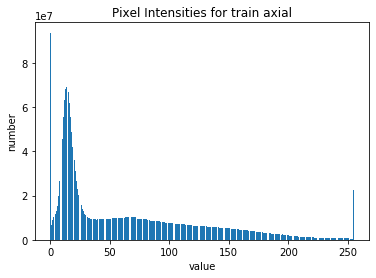

In [0]:
keylist = value_dict.keys()
keylist = list(keylist)
keylist.sort()

valuelist = [value_dict[key] for key in keylist]
valuelist = np.array(valuelist)

comp_value_list = np.divide(valuelist, 1000000)
print(comp_value_list)

barchart(keylist, valuelist, "Pixel Intensities for train axial" , 'value', 'number')

train axial stats: 
mean and std of mean list 63.15623203160096 6.243098755493374
mean and std of std list 60.46483274039529 2.423255865746446


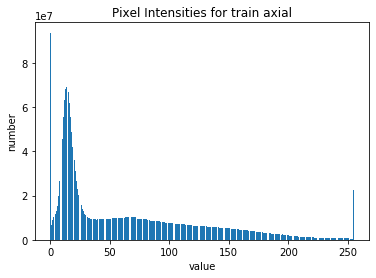

valid axial stats: 
mean and std of mean list 63.78701403818321 6.048546879771857
mean and std of std list 60.633883554311375 2.1470187290998335


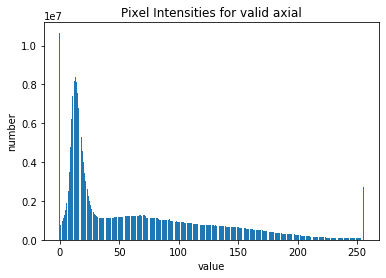

test axial stats: 
mean and std of mean list 63.62054192438069 5.82468040005745
mean and std of std list 60.58033419535018 2.3794872907528335


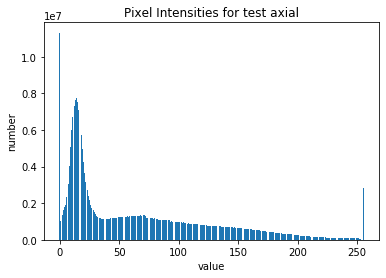

train sagittal stats: 
mean and std of mean list 58.24681201052347 4.80285935287548
mean and std of std list 48.15002141450444 2.4564034515441944


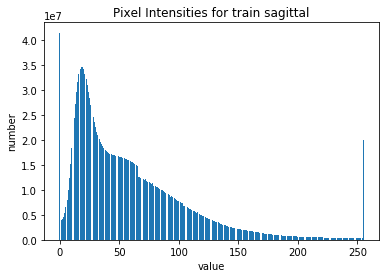

valid sagittal stats: 
mean and std of mean list 57.697031301495905 4.972325338781502
mean and std of std list 48.43310489802276 2.4255178409206413


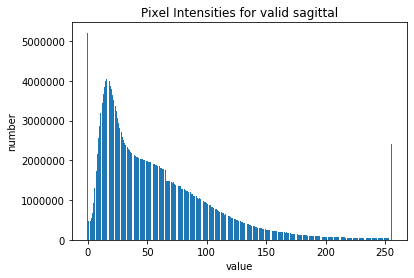

test sagittal stats: 
mean and std of mean list 58.078437704262164 5.043327050196679
mean and std of std list 48.16041545374768 2.4017461197650913


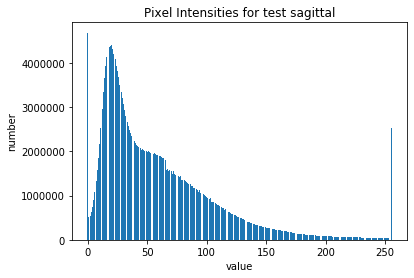

train coronal stats: 
mean and std of mean list 59.274452771370925 5.082412125474742
mean and std of std list 64.00930816470564 1.429674700086583


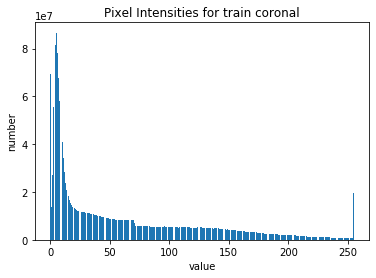

valid coronal stats: 
mean and std of mean list 59.27991431833099 4.804280884337564
mean and std of std list 63.87485960372401 1.4565844792931715


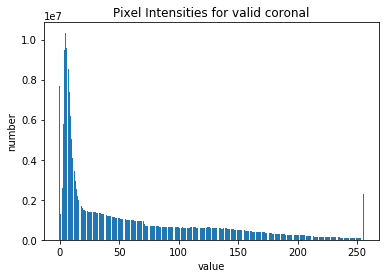

test coronal stats: 
mean and std of mean list 59.082364734491634 5.0083991088856425
mean and std of std list 64.05527921447272 1.4378362699164549


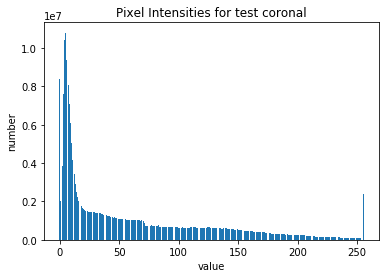

In [0]:
# visualize data 
root = "/content/gdrive/My Drive/thesis/Data/"
oris = ["axial", "sagittal", "coronal"]
sets = ["train", "valid", "test"]

for ori1 in oris:
  for set1 in sets:
    mean_list = list()
    std_list = list()
    value_dict = dict()
    path = root + '/' + set1 + '/' + ori1
    for filename in os.listdir(path):
      file0 = np.load(path + '/' + filename)
      stats0 = file0.flatten()
      mean_list.append(np.mean(stats0))
      std_list.append(np.std(stats0))
      file0 = (file0.flatten()).tolist()
      for value in file0:
        if value in value_dict.keys():
          value_dict[value] += 1
        else:
          value_dict[value] = 1
    keylist = value_dict.keys()
    keylist = list(keylist)
    keylist.sort()

    valuelist = [value_dict[key] for key in keylist]
    valuelist = np.array(valuelist)
    print(str(set1) + ' ' + str(ori1) + ' stats: ')
    print("mean and std of mean list", np.mean(mean_list), np.std(mean_list))
    print("mean and std of std list", np.mean(std_list), np.std(std_list))

    barchart(keylist, valuelist, "Pixel Intensities for " + str(set1) + ' ' + str(ori1) , 'value', 'number')



In [0]:
# model.py

import torch
import torch.nn as nn

from torchvision import models

class MRNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.alexnet(pretrained=True)
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Linear(256, 1)

    # change this to adapt to different networks
    def forward(self, x):
        x = torch.squeeze(x, dim=0) # only batch size 1 supported
        x = self.model.features(x)
        # make sure that gap returns size 256
        x = self.gap(x).view(x.size(0), -1)
        x = torch.max(x, 0, keepdim=True)[0]
        x = self.classifier(x)
        return x

In [0]:
import argparse
import json
import numpy as np
import os
import torch
from datetime import datetime
from pathlib import Path
from sklearn import metrics

def train(rundir, diagnosis, orientation, epochs, learning_rate, transformbool, use_gpu):
    
    val_auc_array = list()
    train_auc_array = list()
    test_auc_array = list()
    train_loader, valid_loader, test_loader = load_data(diagnosis, orientation, transformbool, use_gpu)
    
    model = MRNet()

    if use_gpu:
        model = model.cuda()

    optimizer = torch.optim.Adam(model.parameters(), learning_rate, weight_decay=.01)

    # patience too low (after 5 epochs, if AUC hasnt improved, slash learning rate .3), which is why high learning rate seems to work better
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=.3, threshold=1e-4)

    best_val_loss = float('inf')

    start_time = datetime.now()

    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))

      train_loss, train_auc, _, _ = run_model(model, train_loader, train=True, optimizer=optimizer)
      #print(f'train loss: {train_loss:0.4f}')
      #print(f'train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model, valid_loader)
      #print(f'valid loss: {val_loss:0.4f}')
      #print(f'valid AUC: {val_auc:0.4f}')

      test_loss, test_auc, _, _ = run_model(model, test_loader)

      val_auc_array.append(val_auc)
      train_auc_array.append(train_auc)
      test_auc_array.append(test_auc)
      
      scheduler.step(val_loss)

      """
      if val_loss < best_val_loss:
          best_val_loss = val_loss

          file_name = f'val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name

          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)
      """
    return val_auc_array, train_auc_array, test_auc_array

In [0]:
# loader.py

!pip install medicaltorch

import numpy as np
import os
import pickle
import torch
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from medicaltorch import transforms as mt_transforms
import PIL
from random import sample

from torch.autograd import Variable

INPUT_DIM = 224
MAX_PIXEL_VAL = 255
MEAN = 58.09
STDDEV = 49.73

class Dataset(data.Dataset):
    def __init__(self, datadirs, diagnosis, orientation, use_gpu, transformbool):
        super().__init__()
        self.use_gpu = use_gpu
        self.transformbool = transformbool
        label_dict = {}
        self.paths = []
        print(datadirs)
        
        self.orientation = orientation
        self.diagnosis = diagnosis

        """
        for i, line in enumerate(open('metadata.csv').readlines()):
            if i == 0:
                continue
            line = line.strip().split(',')
            path = line[10]
            label = line[2]
            label_dict[path] = int(int(label) > diagnosis)
        for dir in datadirs:
            for file in os.listdir(dir):
                self.paths.append(dir+'/'+file)

        self.labels = [label_dict[path[6:]] for path in self.paths]

        neg_weight = np.mean(self.labels)
        self.weights = [neg_weight, 1 - neg_weight]
        """

        train_string = "/content/gdrive/My Drive/thesis/Data/train"
        valid_string = "/content/gdrive/My Drive/thesis/Data/valid"
        test_string = "/content/gdrive/My Drive/thesis/Data/test"

        if datadirs == train_string:
          if diagnosis == 'ACL':
            self.labels = train_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = train_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = train_abnormal_labels
        if datadirs == valid_string:
          if diagnosis == 'ACL':
            self.labels = valid_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = valid_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = valid_abnormal_labels
        if datadirs == test_string:
          if diagnosis == 'ACL':
            self.labels = test_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = test_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = test_abnormal_labels

        direct = datadirs + '/' + self.orientation
        for file in os.listdir(direct):
          self.paths.append(direct + '/' + file)
        self.paths.sort()

        #print("paths", self.paths[0:10])

        neg_weight = np.mean(self.labels)
        self.weights = [neg_weight, 1 - neg_weight]

        print(self.labels.shape)
        print(self.weights)

    def weighted_loss(self, prediction, target):
        weights_npy = np.array([self.weights[int(t[0])] for t in target.data])
        weights_tensor = torch.FloatTensor(weights_npy)
        if self.use_gpu:
            weights_tensor = weights_tensor.cuda()
        loss = F.binary_cross_entropy_with_logits(prediction, target, weight=Variable(weights_tensor))
        return loss

    # Data augmentation section
    # can go through each cases, looking at the histogram of 3T vs 1.5T (naive distribution of contrast data?)
    def __getitem__(self, index):
        #print('paths', self.paths)
        path = self.paths[index]

        # with open(path, 'rb') as file_handler: # Must use 'rb' as the data is binary
        #    vol = pickle.load(file_handler).astype(np.int32)
        
        vol = np.load(path)

        """
        # crop middle
        pad = int((vol.shape[2] - INPUT_DIM)/2)
        #print('pad', pad)
        vol = vol[:,pad:-pad,pad:-pad]
        #vol = vol[pad:-pad,pad:-pad,:]
  
        # see if theres a way to reformat an image from 196 to 224 
        # something called interpolate, scikit image. 
        # consider scipy zoom too?


        problemflag = False

        if not(vol.shape[1] == 224) or not(vol.shape[2] == 224):
          #print('problem vol shape', vol.shape)
          delta_1 = (INPUT_DIM - vol.shape[1]) // 2
          delta_2 = (INPUT_DIM - vol.shape[2]) // 2
          padding = (delta_1, delta_2)
          new_vol = np.zeros((vol.shape[0], 224, 224), dtype=np.int32)
          for slice in range(vol.shape[0]):
            vol_slice = vol[slice,:,:]
            img_slice = PIL.Image.fromarray(vol_slice)
            new_vol[slice,:,:] = np.array(PIL.ImageOps.fit(img_slice, [224, 224]), dtype='i')
          vol = new_vol  
          vol.astype(np.int32)
          problemflag = True
          #print('vol shape', vol.shape)
          #print('vol type', vol.dtype)

        """
        #MEAN = np.mean(vol)
        #STDDEV = np.std(vol)

        # standardize
        vol = (vol - np.min(vol)) / (np.max(vol) - np.min(vol) + 1.0e-6) * MAX_PIXEL_VAL
        vol = (vol - MEAN) / STDDEV

        vol = vol.astype(np.float32)

        flag = False
        randomangle = 0

        # define transform policy
        hor_flip = np.random.rand(1)
        ran_rot = np.random.rand(1)
        randomangle = np.random.uniform(-20, 20)
        uni_noise = np.random.rand(1)

        print('randomangle', randomangle)

        """
        if ran_rot < 0.5:
          randomangle = 0
        """

        if self.transformbool:
          #if np.random.rand(1) < 0.5:
          flag = True

          """
          if uni_noise < 0.5:
            noise_array = np.random.uniform(0.8,1.2,256*256)
            noise_array.resize((256,256))
            
            vol = np.multiply(vol, noise_array)
            vol = np.clip(vol, 0, 255)
            vol = vol.astype(np.float32)
          """

          self.transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToPILImage(),
            torchvision.transforms.RandomHorizontalFlip(p=(hor_flip < 0.5)), 
            torchvision.transforms.RandomAffine((randomangle,randomangle + 1e-9), resample=PIL.Image.BILINEAR),
            torchvision.transforms.ToTensor()
        ])

        if flag:
          for sliceindex in range(vol.shape[0]):
            vol[sliceindex] = self.transforms(np.array(vol[sliceindex]))

        vol = np.stack((vol,)*3, axis=1)
        vol_tensor = torch.FloatTensor(vol)
        label_tensor = torch.FloatTensor([self.labels[index]])

        return vol_tensor, label_tensor

    def __len__(self):
        return len(self.paths)

def load_data(diagnosis, orientation, transformbool, use_gpu=True):

    print('load_data', diagnosis, orientation)

    train_path = "/content/gdrive/My Drive/thesis/Data/train"
    valid_path = "/content/gdrive/My Drive/thesis/Data/valid"
    test_path = "/content/gdrive/My Drive/thesis/Data/test"

    batchsize = 1
    numworkers = 4
    
    #assert(1==2)
    #train_dataset = Dataset(train_dirs, diagnosis, use_gpu)
    train_dataset = Dataset(train_path, diagnosis, orientation, use_gpu, transformbool)
    valid_dataset = Dataset(valid_path, diagnosis, orientation, use_gpu, False)
    test_dataset = Dataset(test_path, diagnosis, orientation, use_gpu, False)

    train_loader = data.DataLoader(train_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=True)
    valid_loader = data.DataLoader(valid_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    test_loader = data.DataLoader(test_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=False)

    return train_loader, valid_loader, test_loader


In [0]:
# evaluate.py

import argparse
import matplotlib.pyplot as plt
import os
import numpy as np
import torch

from sklearn import metrics
from torch.autograd import Variable

#from loader import load_data
#from model import MRNet

def get_parser():
    parser = argparse.ArgumentParser()
    parser.add_argument('--model_path', type=str, required=True)
    parser.add_argument('--split', type=str, required=True)
    parser.add_argument('--diagnosis', type=int, required=True)
    parser.add_argument('--gpu', action='store_true')
    return parser

def run_model(model, loader, train=False, optimizer=None):
    preds = []
    labels = []

    if train:
        model.train()
    else:
        model.eval()

    total_loss = 0.
    num_batches = 0

    for batch in loader:
        if train:
            optimizer.zero_grad()

        vol, label = batch
        if loader.dataset.use_gpu:
            vol = vol.cuda()
            label = label.cuda()
        vol = Variable(vol)
        label = Variable(label)

        logit = model.forward(vol)

        loss = loader.dataset.weighted_loss(logit, label)
        total_loss += loss.item()

        #
        pred = torch.sigmoid(logit)
        pred_npy = pred.data.cpu().numpy()[0][0]
        label_npy = label.data.cpu().numpy()[0][0]

        preds.append(pred_npy)
        labels.append(label_npy)

        if train:
            loss.backward()
            optimizer.step()
        num_batches += 1

    avg_loss = total_loss / num_batches

    fpr, tpr, threshold = metrics.roc_curve(labels, preds)
    auc = metrics.auc(fpr, tpr)

    return avg_loss, auc, preds, labels

def evaluate(split, model_path, diagnosis, orientation, use_gpu):
    train_loader, valid_loader, test_loader = load_data(diagnosis, orientation, transformbool, use_gpu)
    model = MRNet()
    state_dict = torch.load(model_path, map_location=(None if use_gpu else 'cpu'))
    model.load_state_dict(state_dict)

    if use_gpu:
        model = model.cuda()

    if split == 'train':
        loader = train_loader
    elif split == 'valid':
        loader = valid_loader
    elif split == 'test':
        loader = test_loader
    else:
        raise ValueError("split must be 'train', 'valid', or 'test'")

    loss, auc, preds, labels = run_model(model, loader)

    print(f'{split} loss: {loss:0.4f}')
    print(f'{split} AUC: {auc:0.4f}')

    return preds, labels

#if __name__ == '__main__':
#    args = get_parser().parse_args()
#   evaluate(args.split, args.model_path, args.diagnosis, args.gpu)

In [0]:
import matplotlib
matplotlib.use('Agg')
gpu = True
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

#learningrate = 5e-05
epochs = 100
#diagnosis = 'ACL'
rundir = "/content/gdrive/My Drive/thesis/Data"
#orientation = 'axial'
savedir = "/content/gdrive/My Drive/thesis/Results/round2"


if gpu:
  torch.cuda.manual_seed_all(seed)

def display_single(x_length, lr1, varray, tarray, testarray, title, xlabel, ylabel, save_dir):
  plt.figure(0)
  plt.title(title)
  plt.plot(np.arange(x_length), varray, label='valid')
  plt.plot(np.arange(x_length), tarray, label='train')
  plt.plot(np.arange(x_length), testarray, label='test')
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.savefig(save_dir + '/' + title + '.eps', format='eps')
  plt.show()
  plt.close()
  return

In [0]:
#sag w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet sgd ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + ' + noise', 'epoch', 'AUC', savedir)

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]
starting epoch 1. time passed: 0:00:00.000047
randomangle -19.176620228167902
randomangle -19.176620228167902
randomangle -19.176620228167902
randomangle -19.176620228167902
randomangle -12.727001311715975
randomangle -12.727001311715975
randomangle -12.727001311715975
randomangle -12.727001311715975
randomangle -2.7221992543153704
randomangle -2.7221992543153704
randomangle -2.7221992543153704
randomangle -2.7221992543153704
randomangle -8.314214058591274
randomangle -8.314214058591274
randomangle -8.314214058591274
randomangle -8.314214058591274
randomangle -12.013048713665611
randomangle -12.013048713665611
randomangle -12.013048713665611
randomangle -12.013048713665611
randomangle 4.301794076057533
randomangle 4.301794076057533
randomangle 4.3

KeyboardInterrupt: ignored